In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap

In [3]:
# Load the dataset
file_path = 'C:\\Users\\Asus\\Desktop\\ML CW\\archive (5)\\cStick.csv'
df = pd.read_csv(file_path)

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Check the shape of the dataset
print("\nShape of the dataset (rows, columns):", df.shape)

# Check column names and data types
print("\nColumn names and data types:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

First 5 rows of the dataset:
   Distance  Pressure      HRV  Sugar level    SpO2  Accelerometer  Decision 
0    25.540       1.0  101.396       61.080  87.770            1.0          1
1     2.595       2.0  110.190       20.207  65.190            1.0          2
2    68.067       0.0   87.412       79.345  99.345            0.0          0
3    13.090       1.0   92.266       36.180  81.545            1.0          1
4    69.430       0.0   89.480       80.000  99.990            0.0          0

Shape of the dataset (rows, columns): (2039, 7)

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accel

In [11]:
# Print column names
print("Column names in the dataset:")
print(df.columns.tolist())

Column names in the dataset:
['Distance', 'Pressure', 'HRV', 'Sugar level', 'SpO2', 'Accelerometer', 'Decision ']


In [4]:
# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())

# Check the distribution of the target variable (Decision)
print("\nDistribution of the target variable (Decision):")
print(df['Decision'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Decision', data=df, palette='Set2')
plt.title('Distribution of Decision')
plt.xlabel('Decision')
plt.ylabel('Count')
plt.show()


Summary statistics for numerical columns:
          Distance     Pressure          HRV  Sugar level         SpO2  \
count  2039.000000  2039.000000  2039.000000  2039.000000  2039.000000   
mean     28.694527     0.988720    95.657002    72.909243    83.563649   
std      23.773644     0.815918    17.576499    46.940110    11.111592   
min       0.000000     0.000000    60.000000    10.000000    60.000000   
25%       7.642500     0.000000    82.418000    40.230000    75.285000   
50%      20.560000     1.000000    97.238000    69.960000    85.280000   
75%      55.205500     2.000000   109.695000    77.612500    92.692500   
max      69.981000     2.000000   124.980000   179.293000    99.990000   

       Accelerometer    Decision   
count    2039.000000  2039.000000  
mean        0.661599     0.988720  
std         0.473282     0.815918  
min         0.000000     0.000000  
25%         0.000000     0.000000  
50%         1.000000     1.000000  
75%         1.000000     2.000000  
ma

KeyError: 'Decision'

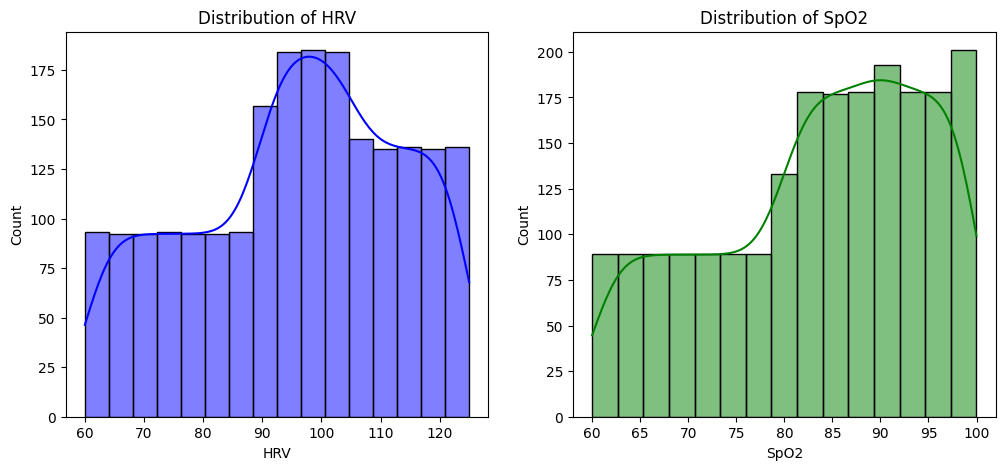

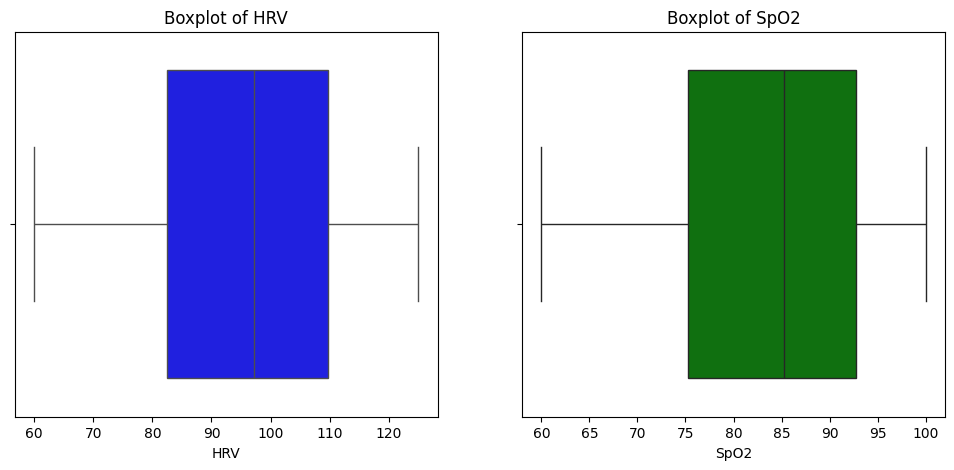

In [5]:
# Histograms for numerical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['HRV'], kde=True, color='blue')
plt.title('Distribution of HRV')

plt.subplot(1, 2, 2)
sns.histplot(df['SpO2'], kde=True, color='green')
plt.title('Distribution of SpO2')
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['HRV'], color='blue')
plt.title('Boxplot of HRV')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['SpO2'], color='green')
plt.title('Boxplot of SpO2')
plt.show()

In [6]:
# Scatter plot to visualize the relationship between HRV and SpO2
plt.figure(figsize=(8, 6))
sns.scatterplot(x='HRV', y='SpO2', hue='Decision', data=df, palette='Set2')
plt.title('Scatter Plot: HRV vs SpO2')
plt.xlabel('HRV')
plt.ylabel('SpO2')
plt.legend(title='Decision')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df, hue='Decision', palette='Set2')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

ValueError: Could not interpret value `Decision` for `hue`. An entry with this name does not appear in `data`.

<Figure size 800x600 with 0 Axes>


Correlation matrix:
               Distance  Pressure       HRV  Sugar level      SpO2  \
Distance       1.000000 -0.946120 -0.816665     0.018344  0.911929   
Pressure      -0.946120  1.000000  0.925209     0.156680 -0.923111   
HRV           -0.816665  0.925209  1.000000     0.309212 -0.724080   
Sugar level    0.018344  0.156680  0.309212     1.000000  0.091933   
SpO2           0.911929 -0.923111 -0.724080     0.091933  1.000000   
Accelerometer -0.941711  0.866866  0.834400    -0.034329 -0.746666   
Decision      -0.946120  1.000000  0.925209     0.156680 -0.923111   

               Accelerometer  Decision   
Distance           -0.941711  -0.946120  
Pressure            0.866866   1.000000  
HRV                 0.834400   0.925209  
Sugar level        -0.034329   0.156680  
SpO2               -0.746666  -0.923111  
Accelerometer       1.000000   0.866866  
Decision            0.866866   1.000000  


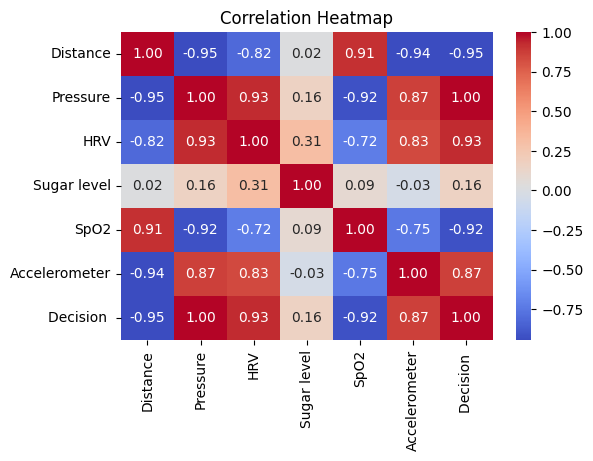

In [7]:
# Correlation matrix
corr_matrix = df.corr()
print("\nCorrelation matrix:")
print(corr_matrix)

# Heatmap of the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

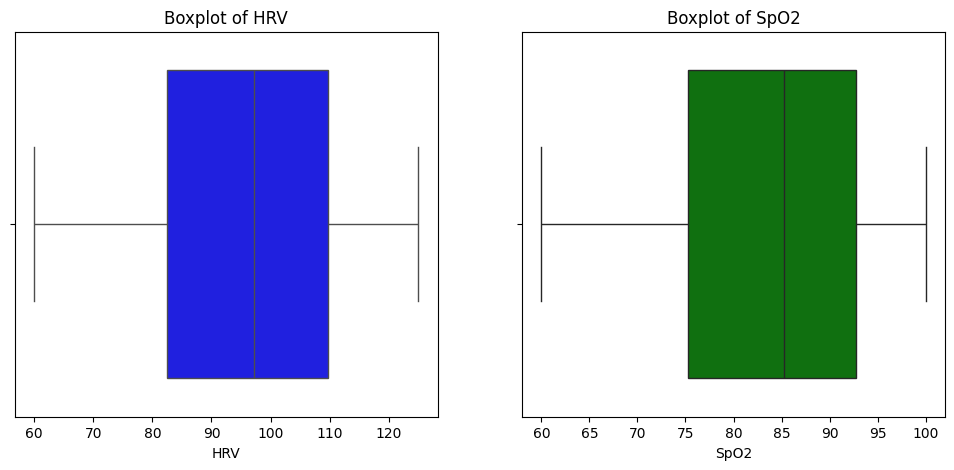


Outliers in HRV:
Empty DataFrame
Columns: [Distance, Pressure, HRV, Sugar level, SpO2, Accelerometer, Decision ]
Index: []

Outliers in SpO2:
Empty DataFrame
Columns: [Distance, Pressure, HRV, Sugar level, SpO2, Accelerometer, Decision ]
Index: []


In [8]:
# Boxplots to detect outliers in numerical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['HRV'], color='blue')
plt.title('Boxplot of HRV')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['SpO2'], color='green')
plt.title('Boxplot of SpO2')
plt.show()

# Calculate IQR for HRV and SpO2
Q1_HRV = df['HRV'].quantile(0.25)
Q3_HRV = df['HRV'].quantile(0.75)
IQR_HRV = Q3_HRV - Q1_HRV

Q1_SpO2 = df['SpO2'].quantile(0.25)
Q3_SpO2 = df['SpO2'].quantile(0.75)
IQR_SpO2 = Q3_SpO2 - Q1_SpO2

# Identify outliers
outliers_HRV = df[(df['HRV'] < (Q1_HRV - 1.5 * IQR_HRV)) | (df['HRV'] > (Q3_HRV + 1.5 * IQR_HRV))]
outliers_SpO2 = df[(df['SpO2'] < (Q1_SpO2 - 1.5 * IQR_SpO2)) | (df['SpO2'] > (Q3_SpO2 + 1.5 * IQR_SpO2))]

print("\nOutliers in HRV:")
print(outliers_HRV)

print("\nOutliers in SpO2:")
print(outliers_SpO2)

In [9]:
# Create new features if needed (e.g., ratios, differences)
df['HRV_SpO2_Ratio'] = df['HRV'] / df['SpO2']
df['HRV_SpO2_Diff'] = df['HRV'] - df['SpO2']

# Check the new features
print("\nDataset with new features:")
print(df.head())


Dataset with new features:
   Distance  Pressure      HRV  Sugar level    SpO2  Accelerometer  Decision   \
0    25.540       1.0  101.396       61.080  87.770            1.0          1   
1     2.595       2.0  110.190       20.207  65.190            1.0          2   
2    68.067       0.0   87.412       79.345  99.345            0.0          0   
3    13.090       1.0   92.266       36.180  81.545            1.0          1   
4    69.430       0.0   89.480       80.000  99.990            0.0          0   

   HRV_SpO2_Ratio  HRV_SpO2_Diff  
0        1.155247         13.626  
1        1.690290         45.000  
2        0.879883        -11.933  
3        1.131473         10.721  
4        0.894889        -10.510  


In [10]:
# Drop unnecessary columns (if any)
df.drop(columns=['HRV_SpO2_Ratio', 'HRV_SpO2_Diff'], inplace=True)  # Example

# Handle missing values (if any)
df.dropna(inplace=True)

# Verify the final dataset
print("\nFinal dataset after preprocessing:")
print(df.info())


Final dataset after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2039 entries, 0 to 2038
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Distance       2039 non-null   float64
 1   Pressure       2039 non-null   float64
 2   HRV            2039 non-null   float64
 3   Sugar level    2039 non-null   float64
 4   SpO2           2039 non-null   float64
 5   Accelerometer  2039 non-null   float64
 6   Decision       2039 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 111.6 KB
None
